Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 30, axis=1)
hook = np.array_split(hook_01, 30, axis=1)
lat = np.array_split(lat_01, 30, axis=1)
palm = np.array_split(palm_01, 30, axis=1)
spher = np.array_split(spher_01, 30, axis=1)
tip = np.array_split(tip_01, 30, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (30):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(27000, 100, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((4500,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


CNN 1D - Modelo com 2 layers de convolução

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

from keras.utils.vis_utils import plot_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 98, 32)            128       
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 32)            3104      
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 32)            1056      
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 18438     
                                                                 
Total params: 22,726
Trainable params: 22,726
Non-trai

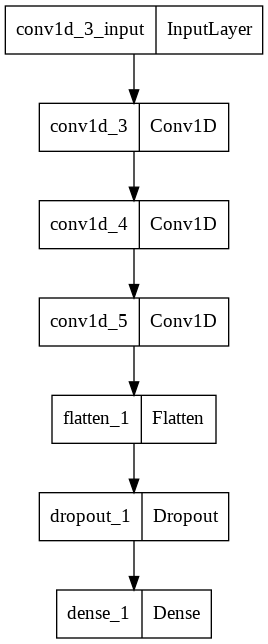

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(32, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

plot_model(model, to_file='multscale_model.png')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=16, epochs=800)

Epoch 1/800
1131/1131 [==============================] - 8s 6ms/step - loss: 1.4602 - accuracy: 0.3508
Epoch 2/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.3610 - accuracy: 0.4131
Epoch 3/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.3218 - accuracy: 0.4341
Epoch 4/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2897 - accuracy: 0.4478
Epoch 5/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2669 - accuracy: 0.4594
Epoch 6/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2480 - accuracy: 0.4676
Epoch 7/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2304 - accuracy: 0.4769
Epoch 8/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2140 - accuracy: 0.4867
Epoch 9/800
1131/1131 [==============================] - 7s 6ms/step - loss: 1.2033 - accuracy: 0.4901
Epoch 10/800
1131/1131 [==============================] - 7s 6ms/step - l

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

566/566 [==============================] - 2s 3ms/step - loss: 0.6543 - accuracy: 0.7833


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[587 240  95 190 257 148]
 [185 735 126  97 274  55]
 [ 46  80 682 270  13 398]
 [119 143 261 613  92 261]
 [147 263  55  64 901  49]
 [ 68  95 371 281  21 628]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.38694792, 0.49932065, 0.45802552, 0.4116857 , 0.6091954 ,
       0.42896175])

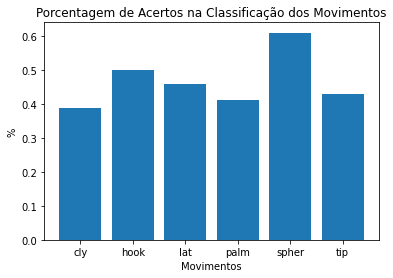

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.07331360662934583

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

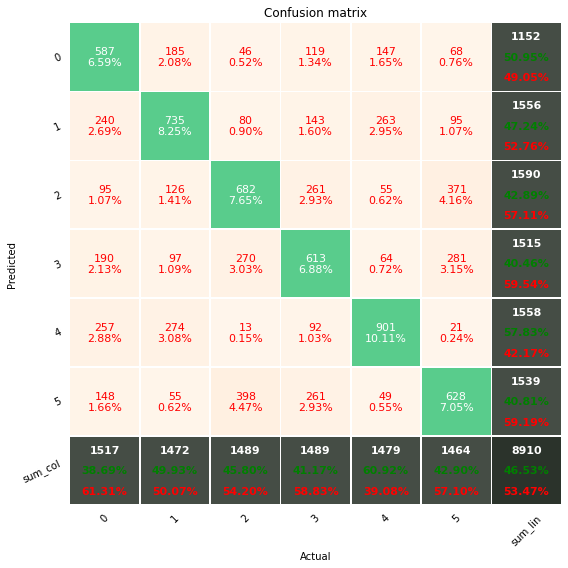

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)